# Regressão Linear

## Bibliotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns

## Conceitos

A **Regressão Linear** é um algoritmo de Machine Learning que tenta prever um valor contínuo/ variável dependente (**Y**) dado alguma variável independente (**X**). O algoritmo é definido pela equação da reta:

$Y = B0 + B1 \cdot X$

$previsão = \text{intersecção} + \text{inclinação} \cdot \text{valor A prever}$


Onde B0 e B1 são calculados por:

$B1 = C(X,Y)*\dfrac{\sigma (X)}{\sigma (Y)}$

$B0=\bar Y-B1*\bar X$

Onde,

- X é a variável independente;
- Y é a variável dependente;
- $\bar X$ e $\bar Y$ é a média de X e a média de Y;
- $\sigma (X)$ e $\sigma (Y)$ é o desvio-padrão de X e o desvio-padrão de Y
- C(X,Y) é a correlação normalizada entre X e Y, dada pela seguinte fórmula:

$C(X,Y) = \dfrac{\sum (X-\bar X)(Y-\bar Y)}{\sqrt{\sum (X-\bar X)^2\sum (Y-\bar Y)^2}}$


## Initial data processing

In [13]:
df = pd.read_csv('data\\mt_cars.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [14]:
df.shape

(32, 11)

## correlogram

<Axes: >

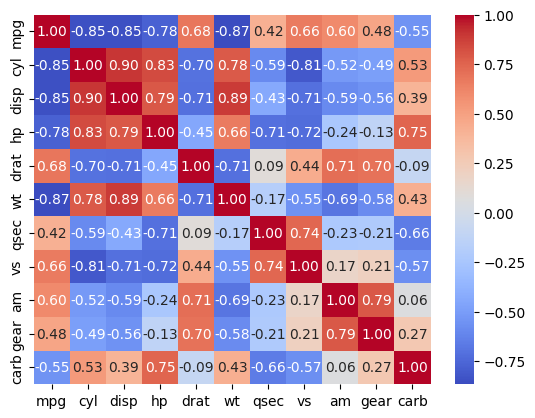

In [15]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot = True, fmt='.2f')

## Dispersion

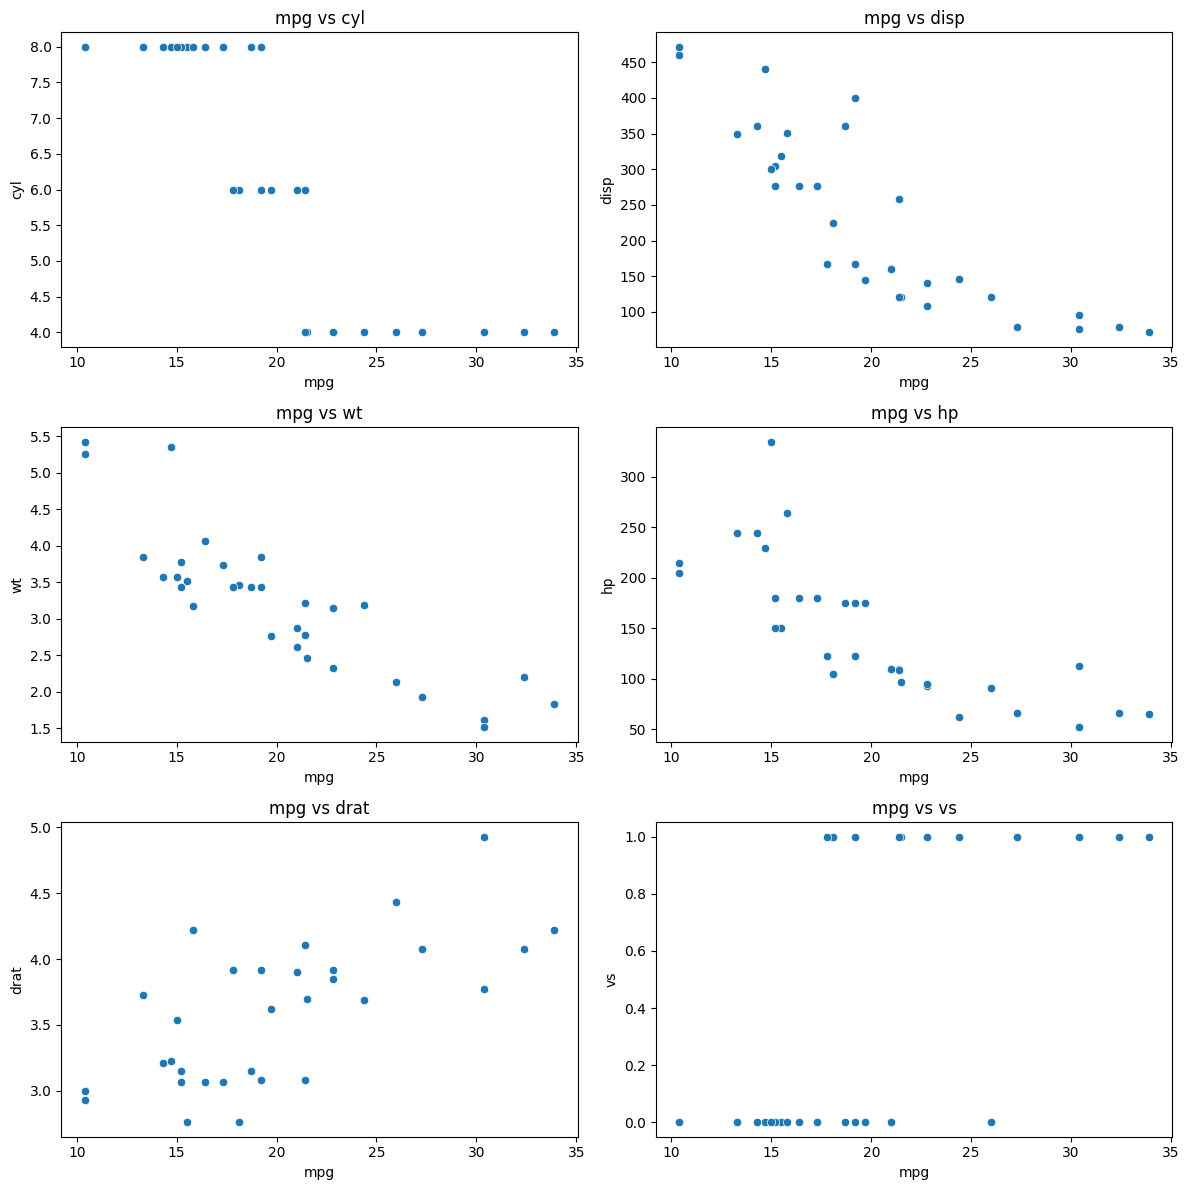

In [24]:
columm_pair = [('mpg', 'cyl'),('mpg', 'disp'),('mpg', 'wt'),('mpg', 'hp'),('mpg', 'drat'),('mpg', 'vs')]
#n_plots = len(columm_pair)
n_cols = 2

fig, axes = plt.subplots(nrows=3, ncols=n_cols, figsize=(12,12))

for i, pair in enumerate(columm_pair):
    x_col, y_col = pair
    row_index = i // n_cols
    col_index = i % n_cols
    sns.scatterplot(x= x_col, y = y_col, data=df, ax = axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()